In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fcc = pd.read_csv(r"C:\Users\Admin\Desktop\2016-FCC-New-Coders-Survey-Data.csv")
print(fcc.shape)

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(15620, 113)


In [3]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [4]:
fcc['JobRoleInterest'].value_counts()
#     normalize = True) * 100

Full-Stack Web Developer            2571
  Front-End Web Developer           1379
Back-End Web Developer               704
  Data Scientist / Data Engineer     646
  Mobile Developer                   414
  User Experience Designer           275
  DevOps / SysAdmin                  219
  Product Manager                    191
  Quality Assurance Engineer         104
Name: JobRoleInterest, dtype: int64

In [5]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()

True     77.933262
False    22.066738
Name: JobRoleInterest, dtype: float64


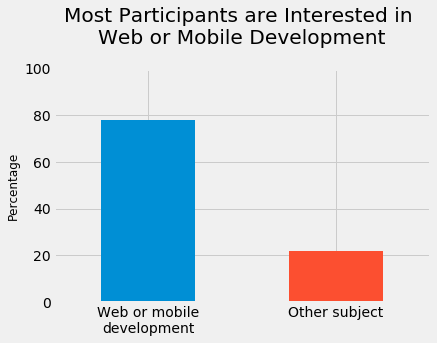

In [6]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above


plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title("Most Participants are Interested in \nWeb or Mobile Development" , y = 1.08)
          # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In [7]:
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100


pd.DataFrame(data = {'Absolute frequency': absolute_frequencies,
                      'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,2979,52.548950
India,382,6.738402
United Kingdom,242,4.268830
Canada,221,3.898395
Australia,122,2.152055
Poland,105,1.852179
Russia,98,1.728700
Ukraine,96,1.693420
Germany,80,1.411184
Brazil,73,1.287705


In [8]:
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

587

In [9]:
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

In [10]:
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
fcc_good['CountryLive'].value_counts().head()

United States of America    2797
India                        329
United Kingdom               219
Canada                       211
Australia                    115
Name: CountryLive, dtype: int64

In [11]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


CountryLive
United States of America    inf
India                       inf
United Kingdom              inf
Canada                      inf
Name: money_per_month, dtype: float64

# Dealing with extreme outliers

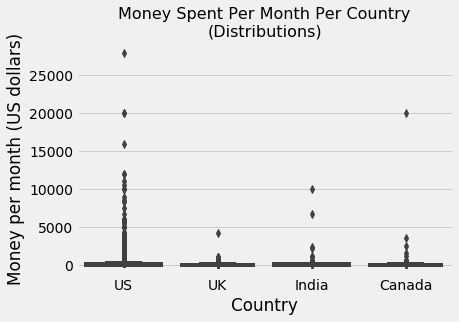

In [12]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [13]:
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

In [14]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    257.211800
India                        52.150771
United Kingdom              157.302162
Canada                       70.621720
Name: money_per_month, dtype: float64

([<matplotlib.axis.XTick at 0x40d8cd1470>,
 <a list of 4 Text xticklabel objects>)

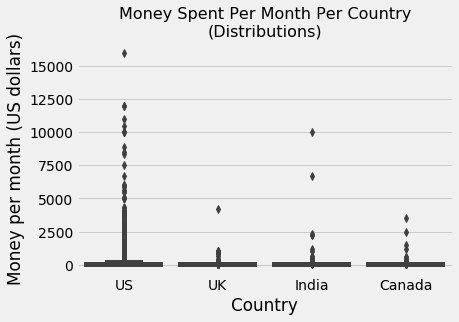

In [15]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
# avoids tick labels overlapplt.show()

In [16]:
india_outliers = only_4[
     (only_4['CountryLive'] == 'India') &
     (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe,money_per_month
2174,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Computer Science,NaN,4166.666667


In [17]:
only_4 = only_4.drop(india_outliers.index)

In [18]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe,money_per_month
487,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,associate's degree,Graphic Design,NaN,6000.000000
1663,24.0,1.0,0.0,NaN,0.0,NaN,Prime Digital Academy,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,bachelor's degree,Psychology,NaN,12000.000000
1999,32.0,1.0,0.0,NaN,1.0,NaN,Galvanize,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,English,31000.0,10500.000000
3919,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,60000.0,8333.333333
4573,32.0,1.0,0.0,NaN,1.0,NaN,Galvanize,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,60000.0,6666.666667
5473,22.0,1.0,0.0,NaN,0.0,NaN,Hack Reactor,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,NaN,NaN,8900.000000
6053,21.0,1.0,0.0,NaN,1.0,NaN,Turing,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,70000.0,10000.000000
6104,27.0,1.0,0.0,NaN,1.0,NaN,Turing,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,bachelor's degree,Information Systems,35000.0,8500.000000
6339,32.0,1.0,0.0,NaN,0.0,NaN,Flatiron School,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,bachelor's degree,North American Studies,NaN,16000.000000
6741,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Computer Science,NaN,7500.000000


In [19]:
no_bootcamp = only_4[
     (only_4['CountryLive'] == 'United States of America') &
     (only_4['money_per_month'] >= 6000) &
     (only_4['AttendedBootcamp'] == 0)
]
only_4 = only_4.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)

]

only_4 = only_4.drop(less_than_3_months.index)

In [20]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') &
    (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe,money_per_month


In [21]:
only_4 = only_4.drop(canada_outliers.index)

In [22]:
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       70.621720
India                        39.568154
United Kingdom              157.302162
United States of America    206.450861
Name: money_per_month, dtype: float64

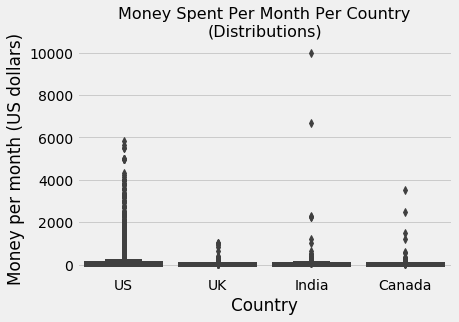

In [23]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [24]:
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    78.498001
India                        9.337521
United Kingdom               6.225014
Canada                       5.939463
Name: CountryLive, dtype: float64